In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
df = pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df=df.dropna()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20433 non-null float64
latitude              20433 non-null float64
housing_median_age    20433 non-null float64
total_rooms           20433 non-null float64
total_bedrooms        20433 non-null float64
population            20433 non-null float64
households            20433 non-null float64
median_income         20433 non-null float64
median_house_value    20433 non-null float64
ocean_proximity       20433 non-null object
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [10]:
x = df.drop(['median_house_value','ocean_proximity'],axis=1)


In [11]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [12]:
y  = df['median_house_value']

In [13]:
from sklearn.linear_model import LinearRegression 

In [14]:
lm = LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
x_train,t_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [17]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
5287,-118.47,34.05,22.0,5215.0,1193.0,2048.0,1121.0,4.7009
17835,-121.86,37.41,16.0,1489.0,262.0,945.0,263.0,7.3861
20336,-118.96,34.23,14.0,15207.0,2924.0,6301.0,2829.0,3.9699
8639,-118.43,33.87,41.0,847.0,173.0,344.0,170.0,6.8220
11178,-117.96,33.83,29.0,1194.0,176.0,474.0,170.0,6.1001
...,...,...,...,...,...,...,...,...
6198,-117.90,34.09,39.0,1726.0,333.0,892.0,335.0,4.3409
6822,-118.09,34.08,42.0,1003.0,236.0,769.0,231.0,3.1607
14640,-117.20,32.79,31.0,3417.0,533.0,1245.0,532.0,4.7788
8862,-118.39,34.06,52.0,1213.0,194.0,503.0,194.0,8.0095


In [18]:
x = x_train.dropna()

In [19]:
y = y_train.dropna()

In [20]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
print(lm.intercept_)

-3642715.5329623246


In [22]:
c = pd.DataFrame(lm.coef_,x.columns,columns = ['coef'])

In [23]:
c

,coef
longitude,-43332.010319
latitude,-42914.204546
housing_median_age,1134.225314
total_rooms,-8.831637
total_bedrooms,109.053037
population,-39.687229
households,59.255132
median_income,40356.011546


In [24]:
pred = lm.predict(x)

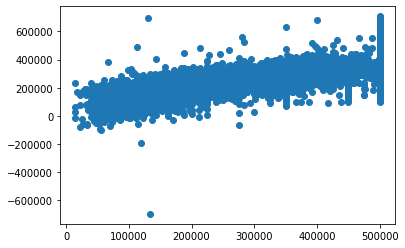

In [25]:
plt.scatter(y,pred)

In [26]:
from sklearn import metrics

In [27]:
metrics.mean_absolute_error(y,pred)

50482.574141011646

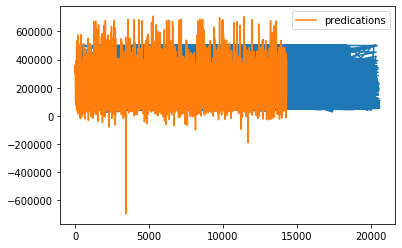

In [34]:
plt.plot(y_test)
plt.plot(pred,label='predications')
plt.legend()